<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/LS_DS_121_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-22 02:46:27--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.32.222
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.32.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  73.5MB/s    in 2.7s    

2019-09-22 02:46:30 (73.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
!curl https://gist.githubusercontent.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b/raw/0a6a6b96c80016cd1e44d8963745ce66196245e0/data_description.md

`orders` (3.4m rows, 206k users):
* `order_id`: order identifier
* `user_id`: customer identifier
* `eval_set`: which evaluation set this order belongs in (see `SET` described below)
* `order_number`: the order sequence number for this user (1 = first, n = nth)
* `order_dow`: the day of the week the order was placed on
* `order_hour_of_day`: the hour of the day the order was placed on
* `days_since_prior`: days since the last order, capped at 30 (with NAs for `order_number` = 1)

`products` (50k rows):
* `product_id`: product identifier
* `product_name`: name of the product
* `aisle_id`: foreign key
* `department_id`: foreign key

`aisles` (134 rows):
* `aisle_id`: aisle identifier
* `aisle`: the name of the aisle

`deptartments` (21 rows):
* `department_id`: department identifier
* `department`: the name of the department

`order_products__SET` (30m+ rows):
* `order_id`: foreign key
* `product_id`: foreign key
* `add_to_cart_order`: order in which each product was added to cart
* `reo

In [0]:
%cd/content

/content


In [0]:
import urllib.request
url = 'https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz'
file_name = 'instacart_online_grocery_shopping_2017_05_01.tar.gz'
urllib.request.urlretrieve(url, file_name)

('instacart_online_grocery_shopping_2017_05_01.tar.gz',
 <http.client.HTTPMessage at 0x7fd98d03e1d0>)

In [0]:
import tarfile
tar = tarfile.open(file_name, "r:gz")
tar.extractall()
tar.close()

In [0]:
import os
print(os.getcwd())

/content


In [0]:
os.chdir('/content/instacart_2017_05_01/')
print(os.getcwd())

/content/instacart_2017_05_01


In [0]:
import glob
glob.glob("/content/instacart_2017_05_01/*.csv")

['/content/instacart_2017_05_01/order_products__prior.csv',
 '/content/instacart_2017_05_01/order_products__train.csv',
 '/content/instacart_2017_05_01/departments.csv',
 '/content/instacart_2017_05_01/orders.csv',
 '/content/instacart_2017_05_01/products.csv',
 '/content/instacart_2017_05_01/aisles.csv']

In [0]:
# aisles dataframe
import pandas as pd
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
# Check shape
aisles.shape

(134, 2)

In [0]:
# Check summary stats
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [0]:
# Check non numeric summary stats
aisles.describe(exclude='number')

,aisle
count,134
unique,134
top,meat counter
freq,1


In [0]:
# departments csv
departments = pd.read_csv('departments.csv')

In [0]:
# Check head
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
# check shape
departments.shape

(21, 2)

In [0]:
# order_products_prior csv
order_products_prior = pd.read_csv('order_products__prior.csv')

In [0]:
# Check head 
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# Check shape
order_products_prior.shape

(32434489, 4)

In [0]:
# order_products_train csv
order_products_train = pd.read_csv('order_products__train.csv')

In [0]:
# Check head
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
# Check shape
order_products_train.shape

(1384617, 4)

In [0]:
# products csv
products = pd.read_csv('products.csv')

In [0]:
# Check head
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
# Check shape
products.shape

(49688, 4)

In [0]:
# orders csv
orders = pd.read_csv('orders.csv')

In [0]:
# Check head
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
# check shape
orders.shape

(3421083, 7)

In [0]:
# combine order_products_prior and order_products_train
order_products = pd.concat([order_products_prior, order_products_train])

In [0]:
# Check shape
order_products.shape

(33819106, 4)

In [0]:
# check shapes for all 3
print(order_products_prior.shape, order_products_train.shape, order_products.shape)

(32434489, 4) (1384617, 4) (33819106, 4)


In [0]:
# Use assert to see if any errors by seeing if 2 uncombined csvs = combined csv
assert len(order_products_prior) + len(order_products_train) == len(order_products)

In [0]:
# Check head
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# Get subset from orders for relevant columns (user_id, order_id, order_number, order_dow, order_hour_of_day)
columns = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']
subset = orders[columns]

In [0]:
# Check head
subset.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7
2,473747,1,3,3,12
3,2254736,1,4,4,7
4,431534,1,5,4,15


In [0]:
# Check subset shape
subset.shape

(3421083, 5)

In [0]:
# merge subset with order_products' columns we want ('order_id', 'product_id', 'add_to_cart_order')
columns = ['order_id', 'product_id', 'add_to_cart_order']
merged = pd.merge(subset, order_products[columns])
merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5


In [0]:
# Merge products wtih merged df keeping product_id and product_name columns
final = pd.merge(merged, products[['product_id', 'product_name']])

In [0]:
# Check head
final.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,product_name
0,2539329,1,1,2,8,196,1,Soda
1,2398795,1,2,3,7,196,1,Soda
2,473747,1,3,3,12,196,1,Soda
3,2254736,1,4,4,7,196,1,Soda
4,431534,1,5,4,15,196,1,Soda


In [0]:
# Create variable to hold just columns we want from final
columns = ['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'add_to_cart_order', 'product_id', 'product_name']
final = final[columns]
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,473747,3,3,12,1,196,Soda
3,1,2254736,4,4,7,1,196,Soda
4,1,431534,5,4,15,1,196,Soda
5,1,3367565,6,2,7,1,196,Soda
6,1,550135,7,1,9,1,196,Soda
7,1,3108588,8,1,14,2,196,Soda
8,1,2295261,9,1,16,4,196,Soda
9,1,2550362,10,4,8,1,196,Soda


In [0]:
# sort values for product_name and order_number
final = final.sort_values(by=['product_name', 'order_number'])
final.head(10)

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
25762051,3799,2541199,1,0,11,6,25773,#2 Coffee Filters
25762052,4060,2098985,1,1,8,15,25773,#2 Coffee Filters
25762061,6404,516206,1,1,10,5,25773,#2 Coffee Filters
25762076,10463,2144789,1,1,9,2,25773,#2 Coffee Filters
25762099,16532,367347,1,3,13,10,25773,#2 Coffee Filters
25762118,21555,128731,1,0,19,13,25773,#2 Coffee Filters
25762197,43543,1770199,1,6,8,7,25773,#2 Coffee Filters
25762202,44613,1941096,1,3,13,6,25773,#2 Coffee Filters
25762213,49757,2777382,1,2,12,1,25773,#2 Coffee Filters
25762233,55145,2748074,1,1,18,5,25773,#2 Coffee Filters


In [0]:
# Remove _ and replace with a space, ''
columns = [col.replace('_', ' ') for col in final.columns]
columns

['user id',
 'order id',
 'order number',
 'order dow',
 'order hour of day',
 'add to cart order',
 'product id',
 'product name']

In [0]:
# change final columns to the new columns
final.columns = columns
final.head(10)

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
25762051,3799,2541199,1,0,11,6,25773,#2 Coffee Filters
25762052,4060,2098985,1,1,8,15,25773,#2 Coffee Filters
25762061,6404,516206,1,1,10,5,25773,#2 Coffee Filters
25762076,10463,2144789,1,1,9,2,25773,#2 Coffee Filters
25762099,16532,367347,1,3,13,10,25773,#2 Coffee Filters
25762118,21555,128731,1,0,19,13,25773,#2 Coffee Filters
25762197,43543,1770199,1,6,8,7,25773,#2 Coffee Filters
25762202,44613,1941096,1,3,13,6,25773,#2 Coffee Filters
25762213,49757,2777382,1,2,12,1,25773,#2 Coffee Filters
25762233,55145,2748074,1,1,18,5,25773,#2 Coffee Filters


In [0]:
# save products we are intested in into a variable
product_names = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']

In [0]:
# product columns
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [0]:
# order columns
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [0]:
# order_products columns
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [0]:
# Select the columns we want for this assignment
merged = (products[['product_id', 'product_name']].merge(order_products[['order_id', 'product_id']]).merge(orders[['order_id', 'order_hour_of_day', 'order_number']]))

In [0]:
# check head
merged.head(10)

,product_id,product_name,order_id,order_hour_of_day,order_number
0,1,Chocolate Sandwich Cookies,1107,11,2
1,769,Sliced American Cheese,1107,11,2
2,6184,Clementines,1107,11,2
3,8048,Packaged Grape Tomatoes,1107,11,2
4,9007,Frosted Flakes,1107,11,2
5,9434,Bag of Large Lemons,1107,11,2
6,12078,Shredded Mexican Blend Cheese,1107,11,2
7,13176,Bag of Organic Bananas,1107,11,2
8,16797,Strawberries,1107,11,2
9,24532,Cranberry Almond Chicken Salad,1107,11,2


In [0]:
# check if product name in df
condition = merged['product_name'].isin(product_names)
subset = merged[condition]

In [0]:
# check subset head
subset.head(25)

,product_id,product_name,order_id,order_hour_of_day,order_number
7,13176,Bag of Organic Bananas,1107,11,2
8,16797,Strawberries,1107,11,2
20,16797,Strawberries,5319,14,65
47,16797,Strawberries,9273,15,1
51,21903,Organic Baby Spinach,9273,15,1
96,16797,Strawberries,13668,17,10
181,16797,Strawberries,25365,20,3
214,16797,Strawberries,33675,18,28
255,13176,Bag of Organic Bananas,43669,18,20
322,16797,Strawberries,54412,13,23


In [0]:
# check unique products in df
subset['product_name'].unique()

array(['Bag of Organic Bananas', 'Strawberries', 'Organic Baby Spinach',
       'Organic Whole Milk', 'Banana', 'Limes', 'Organic Strawberries',
       'Large Lemon', 'Organic Avocado', 'Organic Hass Avocado'],
      dtype=object)

In [0]:
# Column names we needed: (product_id and product_name from products, order_id, order_hour_of_day, order_number from orders
# So the number of times each of the top 10 products were ordered is shown below
subset['product_name'].value_counts().sort_index()

Bag of Organic Bananas    394930
Banana                    491291
Large Lemon               160792
Limes                     146660
Organic Avocado           184224
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Strawberries      275577
Organic Whole Milk        142813
Strawberries              149445
Name: product_name, dtype: int64

In [0]:
# groupby
order_products.groupby('order_id')['product_id'].count().mean()

10.10707325550502

In [0]:
# save it to a variable
grouped_orders = order_products.groupby('order_id')

In [0]:
# return item_id # 2539329
grouped_orders.get_group(2539329)

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [0]:
# Another way
order_products[order_products['order_id'] == 2539329]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [0]:
# get the counts of product_id from grouped_orders df
grouped_orders['product_id'].count()

order_id
1           8
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
           ..
3421053     9
3421055    19
3421056     5
3421057     5
3421058     8
3421059     6
3421060    17
3421061    22
3421062     7
3421063     4
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421070     3
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3346083, dtype: int64

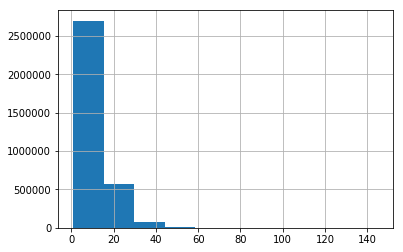

In [0]:
# do histogram
grouped_orders['product_id'].count().hist()

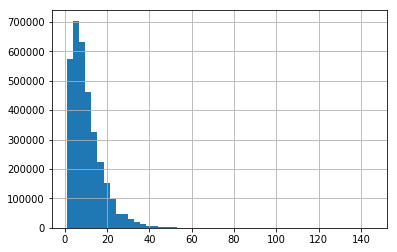

In [0]:
# Change bins to get better look
grouped_orders['product_id'].count().hist(bins=50)

In [0]:
# Hadley Wickham's Example
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
table1=pd.DataFrame([[np.nan, 2], [16,11], [3,1]], index=['John Smith', 'Jane Doe', 'Mary Johnson'], columns=['treatmena', 'treatmentb'])
table2=table1.T

In [0]:
# Check table1
table1

,treatmena,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [0]:
# Check table2
table2

,John Smith,Jane Doe,Mary Johnson
treatmena,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# Table 1 --> Tidy
table1.index

Index(['John Smith', 'Jane Doe', 'Mary Johnson'], dtype='object')

In [0]:
# reset index
table1 = table1.reset_index()
table1

,index,treatmena,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
# melt
tidy = table1.melt(id_vars='index')
tidy

,index,variable,value
0,John Smith,treatmena,NaN
1,Jane Doe,treatmena,16.0
2,Mary Johnson,treatmena,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# Change column names
tidy.columns=['name', 'trt', 'result']
tidy

,name,trt,result
0,John Smith,treatmena,NaN
1,Jane Doe,treatmena,16.0
2,Mary Johnson,treatmena,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# Table 2 -> Tidy
table2.index

Index(['treatmena', 'treatmentb'], dtype='object')

In [0]:
# Reset index like in table1
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmena,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [0]:
# melt
tidy2 = table2.melt(id_vars='index')
tidy2

,index,variable,value
0,treatmena,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmena,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmena,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# Change column names
tidy2.columns = ['trt', 'name', 'result']
tidy2

,trt,name,result
0,treatmena,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmena,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmena,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# Tidy --> Table 1
# check table1
table1

,index,treatmena,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
# do pivot table
tidy.pivot_table(index='name', columns='trt', values='result')

trt,treatmena,treatmentb
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [0]:
# Same with table 2
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmena,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [0]:
# Tidy --> Table 2
tidy2.pivot_table(index='trt', columns='name', values='result')

name,Jane Doe,John Smith,Mary Johnson
trt,,,
treatmena,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
# Flights dataset
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
# check tail
flights.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [0]:
# Pivot table showing number of passengers per month and year
flight_ass = flights.pivot_table(index='year', columns='month')

In [0]:
# Show the df
flight_ass

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
merged = (products[['product_id', 'product_name']].merge(order_products[['order_id', 'product_id']]).merge(orders[['order_id', 'order_hour_of_day', 'order_number']]))
merged.head(10)

,product_id,product_name,order_id,order_hour_of_day,order_number
0,1,Chocolate Sandwich Cookies,1107,11,2
1,769,Sliced American Cheese,1107,11,2
2,6184,Clementines,1107,11,2
3,8048,Packaged Grape Tomatoes,1107,11,2
4,9007,Frosted Flakes,1107,11,2
5,9434,Bag of Large Lemons,1107,11,2
6,12078,Shredded Mexican Blend Cheese,1107,11,2
7,13176,Bag of Organic Bananas,1107,11,2
8,16797,Strawberries,1107,11,2
9,24532,Cranberry Almond Chicken Salad,1107,11,2


In [0]:
merged['order_hour_of_day'].unique()

array([11, 14, 10, 15, 16, 18, 17, 22, 23, 12, 19,  5,  7, 20, 21, 13,  9,
        4,  0,  1,  8,  6,  2,  3])

In [0]:
night_time = merged[merged['order_hour_of_day'] == 23]
night_time.head(25)

,product_id,product_name,order_id,order_hour_of_day,order_number
121,1,Chocolate Sandwich Cookies,18303,23,16
838,1,Chocolate Sandwich Cookies,192065,23,16
839,12341,Hass Avocados,192065,23,16
840,13176,Bag of Organic Bananas,192065,23,16
841,36051,Glass Cleaner,192065,23,16
842,46061,Popcorn,192065,23,16
2918,1,Chocolate Sandwich Cookies,551750,23,2
2919,2512,99% Fat Free Chicken Broth,551750,23,2
2920,9065,Mint Chocolate Cookie Ice Cream,551750,23,2
2921,13870,Lightly Salted Baked Snap Pea Crisps,551750,23,2


In [0]:
night_time.groupby(['product_name']).count().idxmax()

product_id           Banana
order_id             Banana
order_hour_of_day    Banana
order_number         Banana
dtype: object

In [0]:
top_nt = night_time.groupby(['product_name'], sort=False)['order_number'].max()

In [0]:
top_nt

product_name
Chocolate Sandwich Cookies                                                                                             89
Hass Avocados                                                                                                          86
Bag of Organic Bananas                                                                                                 99
Glass Cleaner                                                                                                          26
Popcorn                                                                                                                85
99% Fat Free Chicken Broth                                                                                             35
Mint Chocolate Cookie Ice Cream                                                                                        31
Lightly Salted Baked Snap Pea Crisps                                                                                   98
Jalapeno Pe

In [0]:
import heapq
popular_items = heapq.nlargest(25, top_nt)

In [0]:
popular_items

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####